In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DatasaurusDozen.tsv', encoding = "ISO-8859-1", sep='\t')

In [3]:
df.head()

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333


In [4]:
dataset_names = list(df['dataset'].unique())

In [5]:
df['z'] = df['dataset'].apply(lambda ds: dataset_names.index(ds) * 10)

In [6]:
dataset_names

['dino',
 'away',
 'h_lines',
 'v_lines',
 'x_shape',
 'star',
 'high_lines',
 'dots',
 'circle',
 'bullseye',
 'slant_up',
 'slant_down',
 'wide_lines']

In [7]:
df_pivot = pd.pivot_table(df, values=['x', 'y', 'z'], index=['dataset'])

In [8]:
df_pivot.head(100)

,x,y,z
dataset,,,
away,54.266100,47.834721,10
bullseye,54.268730,47.830823,90
circle,54.267320,47.837717,80
dino,54.263273,47.832253,0
dots,54.260303,47.839829,70
h_lines,54.261442,47.830252,20
high_lines,54.268805,47.835450,60
slant_down,54.267849,47.835896,110
slant_up,54.265882,47.831496,100


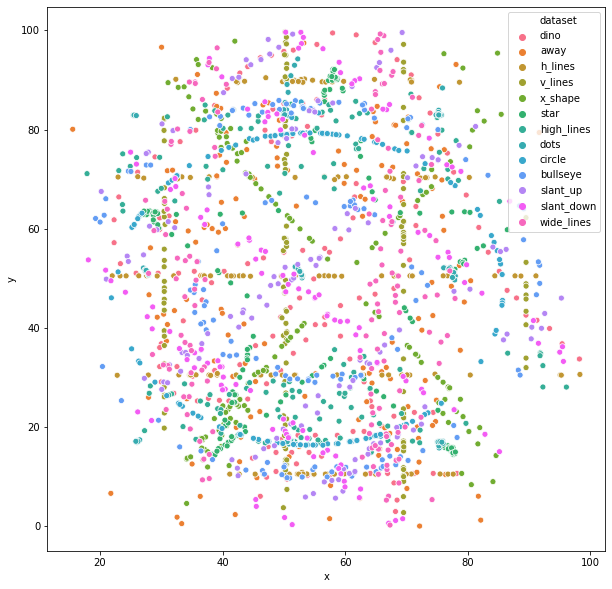

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.scatterplot(x="x", y="y", hue="dataset", data=df)

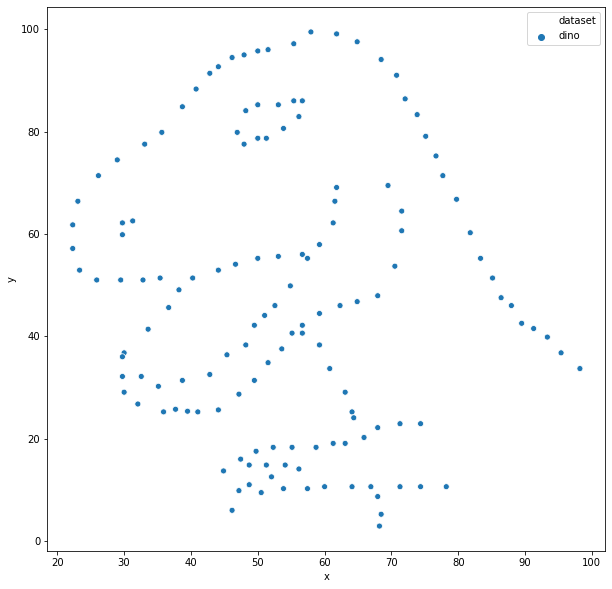

In [10]:
fig, ax = plt.subplots(figsize=(10,10))

df_filter = df[df['dataset'] == 'dino']

ax = sns.scatterplot(x="x", y="y", hue="dataset", data=df_filter)

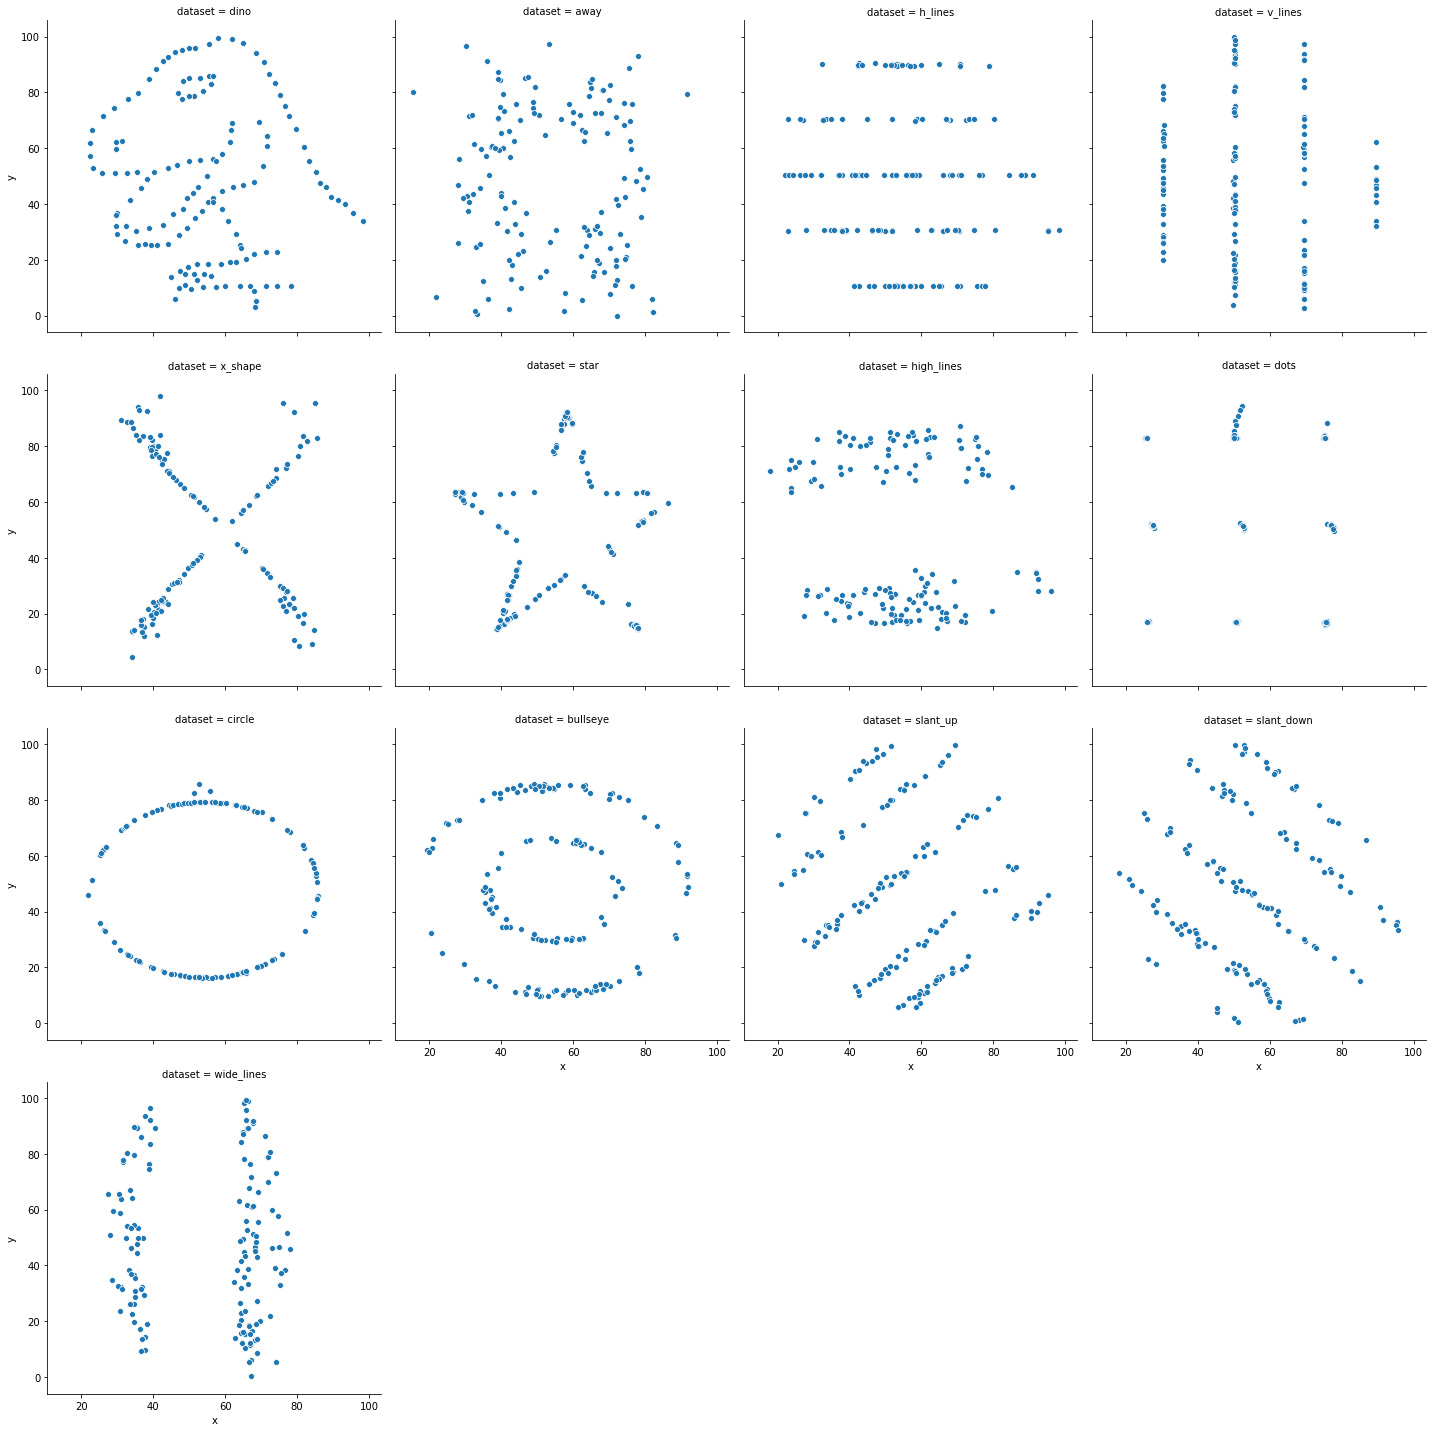

In [11]:
sns.relplot(x="x", y="y", col="dataset", kind="scatter", data=df, col_wrap=4)

In [22]:
import altair as alt

selectDropdown = alt.selection_single(
    name='Select',
    fields=['dataset'],
    init={'dataset': dataset_names[0]},
    bind=alt.binding_select(options=dataset_names)
)

alt.Chart(df).mark_circle().add_selection(
    selectDropdown
).encode(
    x='x',
    y='y',
    tooltip=['x:N','y:N'],
    opacity=alt.condition(selectDropdown, alt.value(0.95), alt.value(0.05))
)

alt.Chart(...)